In [5]:
using  Plots, Optim, Dates, DiffEqParamEstim, Flux, DiffEqFlux, OrdinaryDiffEq

In [6]:
st = 200
x = [87.01,91.19,82.61,80.41,78.1,73.59,71.28,62.48,57.97,53.46,46.75,42.24,35.42,31.02,24.42,17.93,13.53,9.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.29,23.87,40.7,103.4,138.71,187.66,224.73,239.8,239.8,243.98,246.29,259.27,280.28,313.72,349.69,385.77,429.11,470.47,522.83,564.08,604.45,638.66,664.29,681.67,701.03,711.81,718.19,720.17,730.95,732.82,737.11,737.11,739.2,737,736.89,732.6,726.22,719.73,713.13,708.73,704.33,695.64,695.64,691.13,687.06,680.46,678.26,678.15,675.95,680.35,678.26,680.35,684.64,689.15,693.55,700.15,706.86,713.57,715.99,725.01,731.72,740.74,738.87,745.8,750.64,750.75,751.08,751.41,753.94,753.94,756.14,760.98,765.71,766.48,772.09,771.1,776.82,784.74,786.06,785.62,792.44,799.59,802.67,811.91,827.31,836.22,853.82,869,885.94,904.75,911.35,909.81,891.33,870.65,850.19,823.24,794.75,771.43,743.6,713.46,676.83,626.34,570.57,500.28,441.87,400.62,360.69,318.78,268.84,220.88,169.4,123.64,88.33,55.11,37.29,26.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,14.41,81.4,197.12,302.5,386.98,448.91,491.92,498.74,485.21,508.09,540.32,561.88,579.37,603.24,612.04,622.82,633.82,642.51,651.09,666.49,675.07,685.85,694.65,707.96,714.67,718.96,718.85,714.45,712.03,704.66,691.46,682.22,670.89,661.76,654.72,645.59,643.5,639.21,639.21,645.59,652.41,659.01,676.94,692.78,704.44,718.19,732.27,741.73,762.08,776.49,789.36,799.92,809.05,819.28,829.73,846.56,858.33,872.3,893.97,907.06,912.89,910.03,891.44,884.29,868.56,851.4,830.72,805.97,782.98,744.37,689.37,626.34,538.34,451.99,381.48,305.03,229.68,160.82,101.64,52.69,32.78,17.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.16,22.44,104.5,237.93,397.1,497.53,570.24,605.99,586.41,568.92,606.32,634.26,664.84,688.6,710.27,719.07,731.94,736.23,738.32,737.99,729.19,718.19,716.1,704.88,696.08,689.37,676.17,669.46,660.55,645.04,638.55,628.87,615.12,610.72,608.3,604.01,608.52,610.72,612.7,625.79,644.16,654.06,668.58,684.97,699.16,717.53,737.11,750.09,764.06,782.43,801.35,811.03,835.89,854.15,876.04,886.71,897.49,892.87,882.86,869.22,856.24,840.4,830.72,808.28,783.09,750.86,710.6,656.15,588.83,492.58,400.73,301.29,213.51,150.26,92.62,57.09,30.58,13.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.78,52.8,229.35,457.82,583.88,684.31,726.66,699.05,638.77,640.53,660.33,681.78,712.25,734.25,751.63,758.23,760.32,760.21,751.41,739.97,731.06,715.22,704,684.2,670.89,657.91,644.6,634.26,626.01,612.81,601.92,593.12,593.01,588.5,586.19,594.88,605.88,615.01,635.36,642.95,665.5,679.36,697.73,709.5,728.09,740.63,764.61,778.58,790.9,807.51,819.72,838.2,862.73,884.95,902.22,912.56,914.43,906.73,888.36,868.56,853.05,828.85,810.48,783.09,740.08,686.84,612.59,526.13,432.96,357.72,273.13,198.11,132.44,86.02,46.09,28.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,19.91,53.02,201.41,416.46,542.19,637.67,697.4,699.71,660.77,621.83,651.31,684.42,713.13,736.89,749.87,760.65,764.83,760.43,751.41,742.39,726.33,706.09,683.76,663.63,644.38,623.15,610.61,597.41,583.99,579.48,568.26,567.93,572.22,576.29,581.46,590.37,606.21,617.76,633.71,651.75,667.81,682.33,701.36,715.88,733.59,748.99,764.39,784.3,797.83,815.54,835.34,853.6,873.4,893.09,912.78,927.41,933.46,934.45,926.53,902.33,879.78,862.18,842.38,821.7,796.73,757.9,701.47,625.35,533.5,451.22,386.1,313.94,231.88,160.82,103.73,59.29,37.07,23.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.84,36.19,139.59,339.79,478.39,570.68,639.54,659.89,638.44,595.54,614.35,649.33,675.62,708.51,724.02,735.02,743.93,743.93,741.51,734.58,725.67,709.94,698.83,683.32,665.72,648.12,634.92,617.54,604.23,595.43,593.12,586.41,593.01,595.32,608.96,611.93,627.99,639.87,657.91,671.88,687.72,701.58,722.04,732.16,744.59,761.53,773.08,788.59,795.85,809.71,829.95,843.81,865.81,881.32,900.68,911.24,915.2,907.39,894.08,882.53,864.82,857.45,841.06,824.56,799.26,767.03,722.15,668.14,591.58,502.26,416.68,340.12,249.81,176.22,117.15,75.02,41.69,24.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.34,34.43,147.62,365.09,501.71,607.2,669.02,660.88,622.27,601.48,624.36,643.83,672.1,700.48,711.26,724.24,732.93,728.09,725.67,714.34,705.1,689.37,678.26,662.97,654.28,637.23,629.2,620.84,608.19,601.59,592.57,583.77,581.24,578.6,580.69,582.34,588.72,599.83,607.09,625.02,643.28,663.74,677.82,701.25,718.96,738.76,752.51,770.77,789.03,800.8,818.4,836.44,858.77,876.26,891.77,902.44,903.87,898.48,882.2,862.62,847,833.69,820.05,803.66,778.69,744.48,698.72,642.84,567.93,479.71,412.83,339.79,256.63,182.49,112.64,63.69,34.76,21.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.84,38.28,165.44,404.8,549.01,650.43,702.13,674.74,623.15,611.6,639.54,667.59,697.62,723.47,734.47,741.07,742.94,736.12,729.08,711.15,704.44,688.38,670.89,653.84,641.19,622.16,616,603.24,596.97,590.37,581.24,574.31,572,569.36,571.45,569.03,575.08,574.75,583,591.36,602.14,612.7,619.74,630.85,646.36,658.9,673.64,688.82,704.44,717.86,731.06,750.64,761.75,785.51,811.25,835.12,856.9,878.46,895.62,912.67,919.16,918.83,898.15,877.47,848.87,820.27,793.98,762.96,728.86,677.27,600.71,514.47,445.94,390.06,324.83,256.85,173.47,94.6,56.98,30.36,10.45,4.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.93,46.64,222.86,449.24,577.94,668.47,687.72,649.33,603.79,600.71,619.63,643.61,682.55,706.75,719.84,730.95,741.95,743.82,739.2,730.18,714.34,700.81,693.77,676.17,663.08,648.34,631.4,620.73,612.48,604.12,590.92,584.21,573.1,575.08,572.77,574.31,580.8,589.27,597.96,611.6,622.93,639.1,657.03,673.31,688.27,705.43,723.36,733.37,753.5,767.36,789.8,805.53,830.17,852.72,872.74,896.72,909.59,917.84,905.74,891.77,869.55,845.9,826.1,800.91,771.54,739.64,689.04,632.94,551.65,463.98,395.01,317.24,229.57,160.82,103.73,57.09,34.76,8.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,28.05,121.66,339.79,495,607.64,682.88,668.91,617.98,630.3,646.91,661.65,682.88,704.77,711.26,715.22,715,710.38,707.85,703.01,693.99,682.99,674.08,668.14,655.49,644.93,632.39,622.05,619.52,612.81,610.61,608.08,603.68,607.86,607.75,609.84,616.44,625.68,628.21,644.16,651.64,667.59,683.54,700.26,716.76,731.17,747.56,767.14,780.78,794.75,804.32,816.64,834.9,848.65,866.8,886.6,892.54,892.43,884.73,868.89,857.56,840.51,828.63,807.84,780.45,750.64,699.38,645.15,571.23,489.28,399.63,321.86,225.5,154.55,97.13,59.4,35.09,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.84,40.37,180.95,392.7,521.07,626.67,675.51,662.2,616.55,585.09,607.2,630.96,663.63,687.61,704.77,715.77,722.04,721.93,719.29,714.89,714.34,707.63,696.08,691.46,673.75,662.64,651.86,638.88,628.32,615.45,602.8,598.84,592.68,586.19,583.44,582.89,580.36,584.1,583.88,587.51,596.09,608.74,617.98,633.71,647.24,665.94,679.47,695.31,712.36,725.78,743.16,762.3,781.77,796.73,818.18,833.36,852.72,861.3,867.57,873.18,870.98,854.04,838.86,812.46,783.2,759,730.4,698.94,649.77,573.32,482.79,424.82,385.99,320.1,259.16,162.36,90.09,56.87,34.65,12.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.25,26.18,104.5,277.86,440.88,537.9,602.58,592.57,541.2,536.69,561.77,592.02,626.56,652.85,668.14,674.96,681.45,674.63,674.19,671.55,664.4,659.78,662.09,655.71,651.64,647.46,641.19,636.68,632.28,625.46,625.57,616.66,616.66,620.73,620.73,622.49,632.06,637.12,644.49,649.55,660.77,668.14,679.69,692.01,705.98,720.94,736.12,749.76,765.16,778.8,792.22,812.24,825.66,843.15,856.46,869.22,883.96,894.08,893.09,896.61,886.6,873.07,852.83,843.59,827.97,809.71,793.32,761.64,720.83,663.85,591.25,508.64,435.16,368.5,293.26,220.55,145.42,88.11,43.89,26.18,8.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.91,38.61,159.61,335.28,438.13,505.34,544.17,523.93,496.76,519.97,529.98,553.74,590.81,621.61,661.32,698.83,716.65,730.73,750.64,764.5,775.94,784.85,787.27,789.47,793.87,788.04,788.48,786.5,784.85,784.96,783.31,786.17,784.63,781.33,787.05,788.15,796.51,795.96,802.01,805.64,811.03,816.64,822.36,830.06,835.56,840.62,843.7,853.27,858.33,866.03,870.87,871.75,881.1,883.85,884.51,887.37,885.39,885.61,877.14,873.29,860.2,851.4,840.29,829.29,816.64,803.33,783.31,763.51,730.4,693.22,658.68,613.47,574.09,536.8,499.51,464.2,429,393.58,358.05,322.3,290.84,259.38,230.12,208.01,194.48,178.75,167.53,156.2,147.51,142.89,140.47,136.07,131.56,124.85,122.76,120.34,115.72,111.43,102.52,100.32,93.61,84.59,75.57,68.75,57.75,51.04,39.93,35.42,33.11,33.11,30.8,32.89,30.69,34.98,39.27,52.36,69.96,87.34,100.21,106.92,115.61,122.1,126.5,137.17,143.77,145.53,158.51,168.85,179.52,193.82,223.52,244.09,281.93,298.32,312.51,325.16,333.52,341.99,348.15,365.53,376.2,388.85,401.94,414.92,431.86,438.13,446.71,450.89,457.16,454.96,457.16,467.72,469.92,478.61,487.52,494.01,507.21,513.7,522.5,535.59,548.57,561.88,579.26,598.95,618.86,645.59,672.87,700.04,724.35,743.71,763.29,778.25,786.17,792.11,802.34,799.7,801.46,794.75,792.22,794.09,787.38,787.6,783.09,781,781,778.91,781,785.4,783.2,787.6,789.69,794.09,796.18,796.4,794.2,796.4,792.44,790.35,782.21,771.76,763.95,753.83,734.58,709.5,686.51,668.03,648.45,638.66,631.18,615.89,604.45,596.53,593.78,570.35,546.81,520.08,489.39,459.36,431.31,382.58,323.18,280.17,243.87,182.27,106.81,68.53,35.2,19.91,8.8,3.85,3.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.85,11.66,23.98,60.94,171.05,283.8,348.48,399.85,438.46,467.83,471.57,511.06,558.91,591.69,613.8,628.87,639.43,647.79,651.86,658.24,662.31,666.27,674.85,676.61,680.79,678.48,680.35,680.24,673.2,666.38,655.49,653.73,649.44,645.37,637.01,643.39,641.3,641.19,645.48,647.79,651.97,656.26,665.28,671.88,682.99,698.94,708.4,717.97,730.07,739.75,754.05,759.77,772.53,782.1,789.47,799.04,812.57,819.83,833.14,846.45,861.52,869.88,878.02,885.5,871.75,861.41,851.51,832.37,818.51,800.69,784.74,759.55,729.85,682.77,623.7,546.59,465.3,403.04,345.07,284.46,220.77,138.71,74.8,43.78,26.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.16,24.09,74.03,207.57,382.69,490.49,581.79,615.12,593.67,555.06,560.89,593.34,615.34,646.03,667.7,685.08,698.06,704.55,710.82,710.71,710.38,712.47,707.85,698.83,691.9,684.86,671.66,658.35,646.8,642.07,628.21,616.88,606.1,599.5,590.7,586.3,583.88,585.86,587.84,598.51,609.4,620.62,638.66,654.72,670.23,684.2,697.18,716.32,731.72,750.53,766.48,778.47,800.91,821.7,842.27,859.65,881.87,900.79,913.77,911.02,898.92,883.41,862.84,834.79,810.48,785.73,754.16,702.46,629.64,541.09,455.07,385.22,314.16,238.7,165,103.73,61.6,37.07,19.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.01,26.18,95.81,235.73,398.86,489.94,566.72,600.16,578.93,550.44,576.29,597.74,622.05,650.32,665.61,678.81,691.79,700.48,708.95,710.82,706.2,705.76,701.36,696.74,687.94,674.41,663.41,654.17,640.97,625.68,617.1,604.01,601.92,590.92,584.21,586.41,588.28,588.28,596.97,601.15,612.15,623.7,639.87,660.44,676.06,696.74,716.1,730.62,747.78,768.13,786.5,798.93,817.63,838.42,858.77,877.03,901.12,911.9,913.44,903.87,885.28,862.84,836.99,812.79,794.86,762.96,720.06,666.27,596.42,510.4,428.23,355.41,263.78,184.91,123.75,81.51,46.09,26.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.71,34.21,157.08,378.73,492.58,588.94,648.56,638.99,598.62,618.97,640.64,664.73,697.29,719.51,736.67,745.47,754.49,754.49,750.2,743.49,738.87,725.56,714.34,694.43,683.32,663.52,648.12,639.32,628.32,619.63,606.76,604.23,606.54,604.34,611.05,620.62,626.01,642.18,651.86,668.14,677.38,691.13,704.66,718.52,737,754.38,775.61,787.49,801.46,817.63,836.44,852.39,865.92,889.9,903.32,918.06,911.13,899.69,880.88,863.72,843.59,827.09,806.08,783.09,748.22,700.92,644.49,575.52,489.17,402.16,326.37,238.59,169.84,112.75,72.82,39.6,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,23.87,58.96,229.13,457.93,594.88,691.9,739.31,722.7,674.85,637.56,647.13,671.44,701.8,723.69,734.14,745.03,749.32,745.14,738.43,729.85,720.94,705.21,691.68,676.06,664.95,653.95,640.75,625.9,617.32,602.58,592.13,587.84,579.81,577.39,579.15,578.71,580.03,584.1,598.84,609.18,624.47,635.91,660.77,673.53,697.62,713.79,727.43,746.02,764.17,782.32,799.59,818.73,838.31,853.6,870.87,885.83,900.57,904.86,900.57,881.54,861.41,833.14,811.47,787.27,755.59,719.4,656.26,575.52,490.05,424.82,359.7,279.18,200.09,127.82,76.89,43.78,19.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,32.23,143.55,374.99,521.29,637.01,697.07,680.02,636.9,642.73,655.93,677.6,707.85,733.7,744.37,752.62,754.71,756.91,756.69,743.6,734.14,727.32,713.9,698.17,689.37,669.57,656.37,645.7,628.43,615.89,605.55,597.19,586.41,588.17,583.33,585.31,591.25,597.3,607.97,622.71,636.24,654.39,670.67,687.5,704.99,720.72,737,755.48,773.96,790.46,808.39,830.83,853.49,871.42,893.53,904.42,908.27,898.81,884.62,868.78,839.08,816.75,796.4,764.61,723.91,665.94,591.69,501.38,423.61,341.99,249.7,173.91,112.53,68.2,37.07,19.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,32.12,157.41,400.73,534.82,643.61,688.49,660.99,614.02,613.47,641.41,669.68,693.66,715,717.09,725.67,723.25,722.81,720.5,706.97,702.24,686.73,673.09,659.89,647.02,636.02,625.79,619.52,606.43,602.03,593.45,591.14,584.54,577.83,580.03,586.41,588.94,602.58,618.53,635.14,653.73,672.21,688.49,704.44,718.52,737.44,750.64,764.61,778.47,794.64,811.03,833.58,852.06,876.37,887.15,902.11,899.58,886.16,874.83,860.75,834.68,813.89,790.79,758.78,718.74,668.91,608.52,528,429.66,349.25,257.4,167.53,110.55,68.31,41.69,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.71,38.28,151.36,395.12,546.37,646.36,702.57,695.09,649.33,635.58,657.8,688.27,722.81,748.66,768.35,785.4,789.58,789.8,789.69,776.82,770.66,755.37,742.61,731.5,714.01,700.59,689.59,674.3,663.3,652.96,637.78,625.02,616.88,608.63,606.32,602.03,610.83,621.61,625.68,645.48,661.43,680.02,698.72,715.11,733.48,747.67,764.94,779.35,787.6,800.58,819.61,840.84,860.97,879.23,896.83,909.15,902.88,877.91,864.49,846.12,825.77,799.15,767.36,730.07,682.66,617.54,539.33,443.74,356.84,267.63,172.37,108.24,61.49,37.4,15.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.81,23.87,88.99,276.76,433.95,513.26,565.07,566.17,538.56,501.27,524.59,581.35,620.84,658.02,686.18,701.47,718.63,720.61,729.3,733.26,728.53,726.66,722.04,713.02,703.89,688.38,677.05,666.05,652.52,641.52,630.52,621.61,608.52,608.3,601.81,601.7,603.79,605.99,612.26,614.68,625.68,639.43,650.54,666.6,680.35,693.88,710.82,729.85,744.48,764.28,776.38,794.97,811.58,826.1,842.16,862.73,886.93,899.58,914.87,916.08,895.62,879.34,860.09,836.22,815.98,791.01,761.42,715.77,662.09,594.77,512.71,432.85,364.54,279.73,200.2,130.24,83.71,41.69,26.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.93,48.62,211.2,425.59,548.9,638.99,670.67,634.7,589.49,599.06,639.76,674.19,702.46,719.51,728.09,732.38,734.58,736.34,725.34,720.83,713.9,709.5,702.9,691.46,680.46,673.75,665.28,656.81,646.14,635.47,622.71,616.66,610.28,601.59,597.08,596.86,594.22,593.78,597.85,606.1,612.48,622.93,635.91,653.95,672.32,686.4,705.54,722.81,740.3,754.16,772.53,784.85,800.91,814,834.02,853.82,873.62,886.71,897.6,897.49,888.47,865.92,839.41,809.16,785.07,760.32,724.35,681.45,616,539.33,462.77,404.36,337.04,263.67,191.4,119.02,65.89,37.07,19.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,19.91,55.11,209.33,413.93,536.47,627,654.61,618.86,577.39,586.63,601.37,627.33,659.78,682.11,695.31,701.91,706.2,710.27,707.74,703.01,700.26,697.84,693.66,682.55,669.35,651.53,640.75,627.99,616.88,606.1,597.3,592.68,587.95,587.95,587.95,591.8,598.62,605.88,613.03,624.58,638.44,650.1,664.07,682.11,696.19,709.61,730.07,742.94,758.78,776.82,788.92,802.89,821.26,836.88,854.92,870.1,883.08,889.46,891,883.85,858.55,834.46,812.9,795.08,770,744.37,707.41,656.59,591.47,512.6,429.44,355.74,280.72,198.11,136.95,88.33,52.8,30.58,9.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.93,30.36,104.17,271.48,468.71,571.01,645.48,675.07,657.8,608.19,575.19,605.66,638.11,666.6,694.65,710.27,718.74,720.83,718.52,716.1,711.26,708.84,704.33,699.49,686.29,677.05,670.23,657.25,649,642.73,634.48,630.19,625.68,621.17,618.86,618.42,620.4,619.96,626.45,632.5,636.9,645.81,659.45,667.04,680.68,692.45,702.24,714.56,733.37,745.36,758.56,767.47,780.45,784.74,795.74,799.92,814.99,821.15,825.22,839.74,843.48,853.6,859.76,862.84,864.49,861.08,848.76,829.95,797.5,766.15,735.9,692.67,655.93,610.39,560.23,493.9,412.61,325.38,275.11,240.79,185.68,130.46,84.37,35.09,13.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.52,64.35,60.28,93.39,119.13,148.72,193.93,238.59,272.36,291.5,310.75,329.89,350.9,386.43,431.53,488.84,547.36,596.97,644.38,684.53,718.19,737,745.47,749.54,747.23,745.36,734.47,734.69,732.49,736.78,734.69,736.78,736.45,738.43,738.32,740.3,738.1,733.92,727.32,716.87,708.4,697.84,676.5,657.47,633.93,601.7,573.65,536.36,497.86,447.04,392.26,331.21,281.93,237.27,211.75,184.14,154.88,127.6,104.5,87.01,67.54,49.61,35.53,27.61,23.54,19.58,17.6,15.51,13.64,9.57,9.57,7.59,7.59,3.85,3.85,3.85,3.85,3.85,3.85,3.85,3.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.92,12.1,42.68,103.84,169.29,202.29,221.32,232.21,240.79,261.47,288.86,320.54,342.54,371.03,395.12,434.5,463.32,490.16,516.67,533.72,555.28,567.93,578.6,589.16,602.03,616.77,631.73,646.58,663.63,674.08,688.71,703.78,724.9,735.68,744.15,746.13,750.53,750.53,752.73,754.93,750.53,748.44,750.53,748.33,739.97,737.88,733.59,729.63,727.54,725.67,721.49,719.73,719.95,722.48,720.5,722.59,718.63,714.67,712.91,706.2,703.78,696.96,696.19,699.71,695.42,709.17,721.6,732.6,738.32,750.64,763.07,777.48,786.28,801.24,822.36,843.48,861.52,876.92,872.41,847.77,819.17,794.97,766.04,741.07,715.77,677.16,632.5,581.13,509.96,443.96,374.99,304.26,221.32,152.35,101.86,64.02,30.91,15.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,12.1,32.34,133.76,267.74,357.5,420.53,467.06,484,474.1,528,564.85,597.74,626.23,641.41,654.28,662.75,671.22,677.6,674.85,681.01,684.97,687.28,691.79,691.79,693.99,691.9,685.3,680.9,676.61,667.92,667.81,659.01,654.72,654.72,652.63,655.05,657.14,655.27,659.78,666.6,669.46,680.68,690.03,703.78,719.4,733.37,744.81,759.11,777.81,788.04,798.49,811.91,824.45,834.57,851.51,863.39,879.67,892.65,905.74,911.24,899.91,883.52,869.99,856.35,842.16,817.63,790.57,754.38,721.16,676.17,619.85,550.77,466.18,394.35,326.59,238.81,176.22,117.37,77.33,37.29,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.91,57.09,223.63,430.21,545.16,636.9,650.98,606.1,564.96,584.32,616.66,644.93,684.31,701.69,712.8,726,732.27,732.05,720.94,711.92,700.7,691.68,682.55,667.37,656.7,637.89,625.13,612.7,599.61,588.61,581.68,572.55,567.93,565.4,567.27,569.03,577.83,588.72,597.85,613.47,628.87,642.51,656.59,673.2,687.83,703.01,720.72,734.36,750.31,766.04,786.06,805.97,829.73,847.11,869.22,884.4,903.32,911.57,921.8,914.87,896.83,874.61,848.54,820.16,793.65,766.48,723.47,666.93,595.32,504.24,426.69,361.13,283.8,209,138.82,87.89,52.58,26.18,8.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,29.81,88.33,323.18,515.24,642.51,737.77,750.86,706.64,732.93,744.15,757.46,785.51,791.67,800.25,804.54,802.12,793.87,785.51,763.73,743.49,721.05,698.72,676.5,652.3,639.43,622.38,609.73,601.37,595.54,588.72,586.3,586.08,588.17,592.24,594.11,598.29,613.36,624.58,638.22,654.39,670.45,686.51,709.5,726.55,743.82,759.66,776.16,790.24,810.59,822.47,840.62,858.66,876.59,889.46,904.31,912.01,898.26,881.87,864.16,846.78,831.05,817.41,792.22,767.25,728.42,678.26,613.36,527.01,452.1,387.64,325.16,250.03,180.18,114.95,68.2,41.47,26.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,19.91,42.68,173.36,383.02,514.69,605.77,657.36,638.99,592.02,599.39,633.93,664.51,699.71,723.91,741.62,754.82,765.93,765.93,767.91,763.51,754.6,746.13,734.69,719.4,701.91,690.58,673.09,659.67,650.87,639.43,630.63,619.85,608.85,610.94,611.05,612.92,619.63,628.32,641.41,655.27,667.26,681.67,695.64,711.81,723.47,734.91,744.48,754.71,761.75,771.43,781.55,791.34,807.18,825,847.22,865.15,880.11,881.98,872.19,852.28,845.57,821.7,801.57,780.67,753.06,722.92,689.48,644.49,575.74,489.39,396.88,317.35,222.64,152.35,97.13,61.6,35.09,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,28.05,110.44,323.29,492.03,608.63,687.61,682.55,642.07,626.45,648.56,678.92,711.04,733.04,743.93,750.42,754.82,754.49,743.27,729.85,714.23,702.9,687.28,671.77,660.66,645.59,637.23,630.74,620.18,611.71,607.53,603.57,597.41,595.21,590.81,593.01,592.9,590.59,596.75,603.24,600.71,609.18,617.54,628.21,638.66,655.93,676.06,692.45,717.64,735.13,753.06,769.12,786.61,805.53,820.6,848.32,871.09,891.66,909.81,926.64,926.09,909.59,889.24,869,839.52,817.19,790.02,760.43,717.42,664.29,594.44,503.91,428.67,357.28,283.91,207.02,136.73,86.02,46.09,26.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.74,19.8,56.98,240.24,436.37,568.81,666.49,678.37,631.62,592.35,614.24,631.07,657.36,687.83,707.41,716.21,725.23,731.94,727.43,727.21,720.61,711.7,702.68,689.26,675.95,667.15,658.13,647.35,634.59,623.92,615.12,610.83,602.25,599.83,597.52,604.01,615.01,619.08,635.25,647.57,659.56,675.51,689.7,705.43,717.2,729.41,743.6,760.98,774.62,790.46,802.23,818.51,834.79,850.3,870.43,887.7,898.37,906.51,898.81,884.84,870.76,847.33,831.6,806.52,783.75,754.27,708.84,653.18,583.22,499.4,426.47,359.81,275.33,198.11,132.44,83.71,46.09,23.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,25.96,80.19,243.21,432.19,538.34,613.36,629.75,591.91,553.52,559.68,596.42,627.33,659.89,679.58,690.58,701.47,703.78,701.25,701.14,696.63,689.81,692.23,681.34,670.34,661.54,650.65,639.76,628.65,621.72,611.05,604.34,595.54,589.16,591.14,586.74,588.72,593.01,604.23,613.25,626.78,634.15,648.12,659.67,673.53,684.97,703.56,712.58,729.19,739.42,752.07,763.73,775.61,792,802.23,828.96,851.62,869.33,889.13,900.02,901.45,887.59,871.75,852.28,829.95,811.47,790.57,758.78,725.78,678.37,626.67,559.79,473.11,395.12,324.06,236.61,167.64,110.55,68.31,41.69,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.84,42.46,185.13,396.55,512.27,593.78,625.24,593.45,544.28,554.51,600.05,637.45,679.14,703.23,716.87,727.65,736.67,736.45,736.45,733.81,733.7,724.68,720.28,709.28,697.84,684.64,673.64,658.57,654.17,638.99,632.17,625.68,616.77,616.66,616.44,618.53,629.64,634.37,643.61,648.12,661.98,666.82,678.59,688.27,700.48,710.6,729.3,737.99,755.7,773.52,785.29,798.71,812.79,832.81,854.7,870.32,889.79,898.04,903.32,900.35,885.83,861.96,841.61,821.7,797.5,772.31,738.32,693.22,631.95,547.91,459.69,401.61,346.61,270.38,200.53,132.33,74.8,41.47,23.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.1,32.34,153.67,370.7,499.29,601.59,641.96,603.68,550.11,568.92,594.44,629.31,664.07,683.87,694.87,705.76,712.58,714.45,714.45,709.5,707.19,700.81,700.59,693.88,685.41,678.7,665.39,656.81,648.01,639.32,628.32,623.81,621.5,621.5,621.72,628.32,638.11,643.17,650.76,664.4,671.44,681.12,694.98,706.75,723.36,737.66,750.64,767.8,781.11,792.33,801.9,819.72,837.21,857.56,873.4,890.67,903.32,904.86,906.18,885.39,880.66,853.93,829.84,806.74,781.77,749.98,706.64,652.52,582.78,496.65,413.05,337.59,250.47,167.64,106.04,66,39.49,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.16,24.09,78.32,223.52,416.9,539.22,639.32,666.38,624.03,591.58,604.78,617.43,643.61,669.68,689.26,704.55,713.35,717.64,719.84,719.62,715.22,717.2,708.4,703.78,696.85,683.54,672.54,659.34,650.32,639.1,632.39,623.59,617.32,615.12,615.12,617.32,619.3,623.7,625.68,630.08,639.1,657.25,664.95,681.45,693.44,707.96,726.11,740.08,754.27,769.78,782.87,797.06,807.29,819.5,837.98,853.6,875.71,888.91,901.56,903.1,898.37,882.09,860.42,848.87,821.92,798.71,768.68,733.7,688.82,632.61,557.15,473.22,387.97,308.55,220.55,154.33,112.86,72.82,41.91,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.25,30.69,151.8,325.38,477.51,576.18,634.26,610.39,558.69,576.07,614.24,646.58,683.21,702.9,709.28,715.77,707.08,704.55,697.51,688.49,679.36,676.5,665.39,667.37,660.44,647.57,645.48,643.5,630.85,628.87,624.8,618.64,614.35,608.08,603.24,605.22,604.67,606.32,608.19,616.44,618.42,626.56,635.03,650.54,664.07,678.15,693,705.21,720.72,729.85,745.58,761.86,770.77,788.59,808.06,821.04,840.95,853.71,873.07,881.65,890.23,894.41,876.59,858.66,838.75,810.37,786.17,762.08,737,702.79,648.89,580.36,493.57,422.51,365.09,297.77,225.28,156.2,85.91,43.67,21.67,4.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,25.96,82.39,211.2,366.52,449.68,505.01,536.69,537.46,503.47,550.66,589.93,613.8,646.58,671,688.6,708.29,718.74,727.76,732.71,741.95,744.48,746.79,744.81,747.01,744.48,730.73,730.4,727.76,723.03,723.03,724.02,726.44,729.74,735.13,735.46,742.83,741.51,746.79,756.47,759.88,769.56,774.73,778.36,783.97,789.91,795.74,803.66,803.44,817.96,819.39,825,828.96,834.13,844.03,849.09,854.48,857.67,865.59,868.78,872.08,870.43,868.78,854.37,848.32,830.72,804.43,768.35,733.48,703.01,661.54,622.27,589.6,545.71,501.49,457.49,413.49,361.68,311.96,266.42,232.32,209,195.47,180.29,169.07,153.23,135.85,120.34,102.63,91.3,71.5,55.99,49.17,40.26,26.95,20.24,13.53,11.22,4.51,4.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.2,69.96,67.87,82.83,91.3,104.17,114.95,125.73,142.89,164.23,185.79,219.01,248.93,278.63,306.35,312.18,320.43,320.76,320.65,323.95,331.21,344.41,363,381.26,410.96,440.44,472.89,503.14,529.1,546.26,565.73,585.53,613.8,637.89,664.07,685.96,707.74,727.32,740.41,742.5,744.59,735.68,733.15,728.64,719.62,710.82,703.89,702.02,695.31,695.2,695.31,688.82,691.02,684.53,691.02,686.62,686.62,690.91,695.31,697.4,699.49,710.38,716.65,718.85,728.09,733.15,736.78,749.1,754.6,756.25,760.65,763.84,770.99,775.72,781.77,798.16,808.17,822.69,832.59,842.6,854.59,855.69,860.75,865.92,864.38,856.13,843.7,818.18,792.22,758.23,719.73,680.02,639.65,590.15,524.81,452.1,386.87,350.9,300.08,214.06,151.14,111.98,74.47,48.07,32.56,12.87,4.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.19,48.95,181.28,331.21,423.5,503.47,520.96,506.11,525.14,551.32,579.81,608.52,636.68,654.72,670.45,687.83,701.25,709.83,709.72,725.01,729.52,735.79,742.39,747.01,740.3,739.97,730.95,725.78,714.45,700.7,696.3,688.05,684.2,684.53,679.03,680.24,688.16,693.33,698.5,707.74,717.09,726.44,733.48,745.91,751.52,766.26,777.37,786.39,799.7,811.36,824.56,842.27,855.14,869.88,882.75,895.07,894.74,889.02,867.02,859.87,850.52,842.93,820.16,805.86,780.67,748.11,712.03,664.84,602.47,525.58,433.84,362.67,282.92,200.53,141.35,97.13,61.6,35.09,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,34.21,157.08,378.4,500.61,594,630.41,603.79,593.23,606.76,619.74,641.63,665.72,687.83,705.32,716.43,725.12,731.61,731.72,729.74,727.43,720.61,722.81,709.61,700.7,685.19,676.5,667.59,656.48,647.13,637.89,628.76,619.85,613.36,613.47,611.27,615.89,618.31,627.55,644.38,665.72,686.95,705.98,724.46,738.54,754.82,770,783.75,791.78,801.9,816.2,831.27,842.6,859.98,868.45,876.92,865.7,851.51,838.2,832.7,821.37,809.38,785.95,762.41,729.41,686.4,632.72,563.75,471.02,382.58,290.95,194.7,128.15,81.62,50.49,28.6,13.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.07,22,91.41,272.91,416.68,500.28,566.28,579.7,549.89,535.92,583.88,618.86,649.44,673.31,684.09,694.98,699.16,699.16,696.85,694.65,690.03,685.41,678.7,667.7,660.88,645.37,638.33,627.22,616.11,605.11,600.6,595.98,587.18,586.96,582.45,582.56,580.25,584.65,588.94,597.3,608.19,628.32,640.42,661.43,675.84,699.16,717.86,734.36,752.51,769.56,784.19,801.35,821.7,846.34,866.25,883.96,899.14,891.99,880.66,871.31,851.73,842.38,817.74,801.24,773.96,734.58,689.37,631.07,553.08,459.03,378.95,285.56,194.04,128.26,79.31,46.09,24.2,4.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.01,28.27,125.84,325.93,447.7,530.53,594.99,593.12,560.45,592.24,618.2,642.18,661.98,686.07,701.58,712.25,718.85,725.23,727.1,722.81,722.59,715.99,704.88,697.95,688.71,679.8,664.29,651.09,642.4,631.51,625.02,623.26,619.74,622.93,621.83,629.09,636.9,644.16,649.55,665.28,672.43,692.67,706.09,719.84,729.41,748.11,757.24,777.59,789.58,801.79,817.52,839.19,856.68,872.08,891.33,891.33,886.27,866.25,856.79,844.8,824.45,807.62,775.5,742.5,701.8,652.41,583.55,495.88,400.73,310.97,218.9,150.37,99.22,61.71,35.31,15.51,4.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.91,67.32,280.06,461.34,562.1,624.36,644.71,615.12,584.43,614.68,647.24,682.22,714.67,727.65,740.96,743.16,745.36,741.18,734.47,727.54,718.96,701.36,692.45,676.94,657.03,639.54,624.36,613.91,603.46,588.72,586.85,578.16,571.45,569.14,571.56,573.54,577.83,586.3,601.7,616.99,644.05,671.77,690.47,718.08,738.98,755.81,767.25,785.84,796.29,813.67,828.19,850.74,864.71,882.42,887.04,886.49,866.25,850.63,838.97,808.28,787.27,752.84,715.44,667.81,607.53,536.36,440.22,342.21,241.89,141.68,83.71,45.98,28.71,13.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.93,42.68,197.34,434.39,566.94,668.25,711.04,679.03,627.55,631.18,666.6,703.45,736.23,757.68,770.55,776.6,782.98,778.8,770.22,759.33,748.55,728.31,710.49,692.67,676.83,661.32,643.72,624.47,611.49,603.24,592.9,586.63,580.03,575.63,577.61,579.37,579.04,585.09,591.25,601.7,610.06,621.06,640.75,656.59,675.29,701.36,716.76,737.88,756.8,778.25,801.02,823.79,842.82,861.08,880.55,902.77,909.37,912.78,896.39,874.06,854.15,834.24,818.73,800.36,777.7,736.89,691.24,628.54,547.58,468.27,403.48,332.53,249.81,176,112.64,63.69,39.38,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.75,34.21,157.41,400.73,545.05,650.98,713.9,706.2,661.21,639.76,675.84,704.44,739.2,758.67,775.94,784.74,786.83,787.05,780.89,765.93,759.77,742.17,724.9,711.26,695.86,680.57,665.06,647.57,638.66,629.64,615.78,608.85,602.36,595.76,597.96,597.74,599.94,613.36,622.93,641.63,662.75,683.76,696.19,716.76,730.73,744.59,758.78,773.85,783.86,798.38,808.83,824.89,851.84,865.15,884.73,897.71,893.31,883.85,877.03,865.92,856.35,840.29,823.79,798.38,766.04,725.78,673.75,604.67,514.14,424.16,340.12,245.41,165.55,108.24,64.02,28.6,13.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.66,25.96,119.13,361.24,509.63,611.6,671.44,661.54,620.73,583.99,619.3,660.66,698.28,726.22,736.89,736.67,745.36,747.45,740.74,731.94,725.12,718.63,698.72,692.01,676.5,659.01,647.68,634.48,621.5,613.03,604.12,593.23,584.54,584.54,577.72,575.52,579.81,586.08,599.5,613.03,629.31,645.81,666.38,687.06,705.76,726.88,748.55,767.14,781.77,798.6,815.21,837.98,853.6,871.42,886.6,884.18,882.97,869.44,858,845.02,827.2,815.32,799.04,778.14,744.26,702.35,643.83,573.98,486.97,411.73,337.92,254.43,176.22,112.86,68.42,39.38,19.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.25,32.34,125.84,324.94,512.71,628.76,718.85,728.53,689.59,652.3,672.43,704.88,732.6,747.45,755.59,759.66,759.11,754.49,745.58,736.78,723.69,710.93,698.17,687.28,676.39,667.7,654.72,646.14,635.25,622.27,611.38,598.51,589.93,578.93,575.19,568.81,566.94,562.54,564.74,569.25,569.03,579.37,582.89,588.94,597.08,607.42,620.07,634.81,654.28,672.54,683.43,703.12,715.22,735.46,758.78,786.06,810.92,837.54,854.81,869.55,875.27,872.41,862.4,840.4,818.29,785.73,748.99,714.12,681.23,629.97,554.18,461.67,406.56,369.82,306.57,241.12,144.98,81.07,52.47,25.85,8.69,4.18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.93,48.73,227.37,448.91,577.28,672.98,678.37,628.87,574.31,548.13,576.29,602.14,626.12,652.3,663.3,674.3,676.39,678.26,669.35,664.62,655.27,652.63,645.7,632.61,626.12,613.36,605,594.33,585.86,577.72,562.76,553.74,555.61,546.7,544.17,547.91,547.36,555.72,564.3,579.7,593.23,608.85,624.69,643.06,664.51,684.42,702.24,723.25,737,759.22,779.57,799.59,818.95,838.86,856.24,873.62,883.96,893.97,885.61,880.11,869,850.85,831.49,811.69,789.25,761.97,725.67,675.84,611.6,529.87,454.74,394.24,323.07,247.83,169.4,103.73,57.09,30.47,12.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.66,28.05,108.24,339.46,518.54,627.66,699.27,687.39,625.35,599.06,613.8,633.16,665.28,689.37,704.55,717.31,726,730.07,729.85,727.54,720.72,711.92,712.14,705.87,695.42,686.95,680.57,673.97,665.28,654.28,647.79,639.1,641.41,639.32,642.07,644.93,650.1,650.65,655.93,658.68,672.65,677.71,687.17,700.48,709.39,721.05,732.71,743.16,756.58,763.51]
y = ones(st);
for i in 2:length(y)
    y[i]=y[i-1]+0.01
end
ode_data = transpose(hcat(x[1:st],y[1:st]))
u0 = [x[1],y[1]]
tspan = (0.0f0, 3.f0)
t = range(tspan[1], tspan[2], length = length(ode_data[1,:]))
species1 = "Gait"
species2 = "dummy data";

In [7]:
# Structure to observe training
mutable struct saver
    losses::Array{Float64,1}
    times::Array{Dates.Time,1}
    count_epochs::Int128
end
function saver(n_epochs)
    losses = zeros(n_epochs)
    times = fill(Dates.Time(Dates.now()),n_epochs)
    count_epochs = 0
    return saver(losses,times,count_epochs)
end
function update_saver(saver, loss_i, time_i)
    epoch_i = saver.count_epochs
    saver.losses[epoch_i] = loss_i
    saver.times[epoch_i] = time_i
end

update_saver (generic function with 1 method)

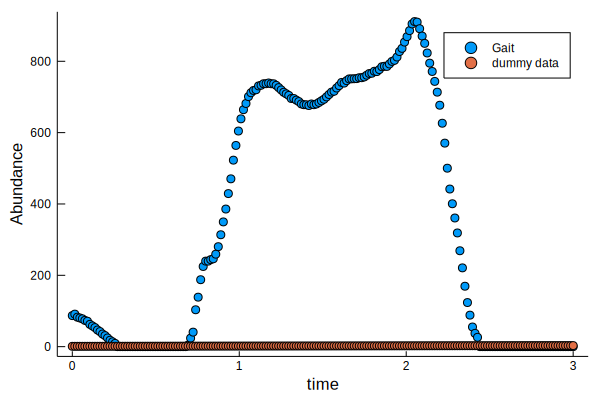

In [8]:
scatter(t, ode_data[1,:], grid = "off", xlab = "time", ylab = "Abundance", label = species1 )
scatter!(t, ode_data[2,:], label = species2 )

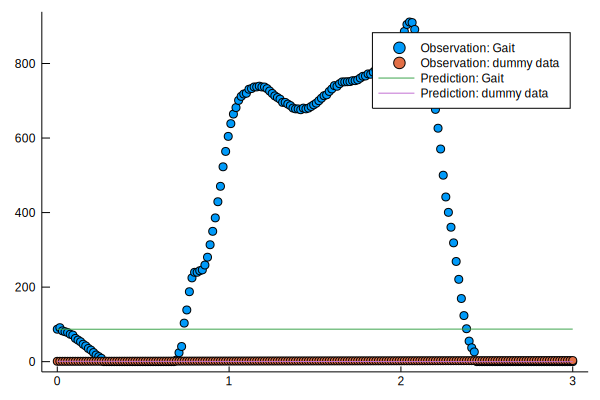

In [9]:
# Building a neural ODE and see starting point
# Derivative is modeled by a neural net. Chain concatinates the functions ode function and two dense layers.
dudt = Chain(Dense(2,100,tanh),
       Dense(100,500,tanh),
       Dense(500,500,tanh),
       Dense(500,100,tanh),
       Dense(100,2))
# Parameters of the model which are to be learnt. They are: W1 (2x50), b1 (50), W2 (50x2), b2 (2)
ps = Flux.params(dudt)
# Defining anonymous function for the neural ODE with the model. in: u0, out: solution with current params.
n_ode = x->neural_ode(dudt, x, tspan, Tsit5(), saveat = t, reltol = 1e-7, abstol = 1e-9)
n_epochs = 1000
sa_l2 = saver(n_epochs)
# L2 loss
L2_loss_fct() = sum(abs2, ode_data .- n_ode(u0))
# Callback function to observe L2 training.
cb = function ()
    sa_l2.count_epochs = sa_l2.count_epochs + 1
    update_saver(sa_l2, Tracker.data(L2_loss_fct()), Dates.Time(Dates.now()))
    #println("\"", Tracker.data(L2_loss_fct()), "\" \"", Dates.Time(Dates.now()), "\";")
end

pred = n_ode(u0)
scatter(t, ode_data[1,:], label = string("Observation: ", species1), grid = "off")
scatter!(t, ode_data[2,:], label = string("Observation: ", species2))
plot!(t, Flux.data(pred[1,:]), label = string("Prediction: ", species1))
plot!(t, Flux.data(pred[2,:]), label = string("Prediction: ", species2))

In [ ]:
# train n_ode with L2 norm
opt = ADAM(0.00001)
data = Iterators.repeated((), n_epochs)
@time Flux.train!(L2_loss_fct, ps, data, opt, cb = cb)

In [ ]:
scatter(t, ode_data[1,:], label = string("Observation: ", species1), grid = "off")
scatter!(t, ode_data[2,:], label = string("Observation: ", species2))
plot!(t, Flux.data(pred[1,:]), label = string("Prediction: ", species1))
plot!(t, Flux.data(pred[2,:]), label = string("Prediction: ", species2))

In [ ]:
header = string("l2 losses:",sa_l2.times[end]-sa_l2.times[1])
plot(range(1, stop = length(sa_l2.losses)), log.(sa_l2.losses), width = 2, label = header, grid = "off")